In [1]:
import os.path as op
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

bids_folder = '/Volumes/mrenkeED/data/ds-dnumrisk'
bids_folder = '/mnt_03/ds-dnumrisk'
subjects = [f for f in os.listdir(bids_folder) if f[0:3] == 'sub' and len(f) == 6] # int(f[4:]) 

In [14]:
fmriprep_confounds_include = ['framewise_displacement']
ses = 1
data = []
errors = []

for sub in subjects:
    try:
        subject_data = {'subject': int(sub[4:])}
        fd_all_runs = []
        
        for run in range(1, 7):
            try:
                fmriprep_confounds_file = op.join(bids_folder, 'derivatives', 'fmriprep', sub, f'ses-{ses}', 'func', f'{sub}_ses-{ses}_task-magjudge_run-{run}_desc-confounds_timeseries.tsv')
                fmriprep_confounds = pd.read_table(fmriprep_confounds_file)[fmriprep_confounds_include]
                fd = fmriprep_confounds['framewise_displacement']
                
                subject_data[f'run_{run}_mean'] = fd.mean()
                subject_data[f'run_{run}_max'] = fd.max()
                fd_all_runs.extend(fd)
            except FileNotFoundError:
                subject_data[f'run_{run}_mean'] = np.nan
                subject_data[f'run_{run}_max'] = np.nan
                errors.append(f'{sub},{run}')

        subject_data['overall_mean'] = np.nanmean(fd_all_runs)
        subject_data['overall_max'] = np.nanmax(fd_all_runs)
        
        data.append(subject_data)
    except Exception as e:
        errors.append(sub)

df = pd.DataFrame(data)
df = df.set_index('subject').sort_index()
print(errors)

['sub-47,2', 'sub-53,2', 'sub-05,5', 'sub-62,3']


In [13]:
df.head()

,subject,run_1_mean,run_1_max,run_2_mean,run_2_max,run_3_mean,run_3_max,run_4_mean,run_4_max,run_5_mean,run_5_max,run_6_mean,run_6_max,overall_mean,overall_max
0,21,0.076588,0.205229,0.091471,0.403834,0.185063,1.390921,0.109191,0.370376,0.159461,2.089698,0.121523,0.550279,0.123883,2.089698
1,59,0.278765,3.210104,0.236527,1.720892,0.388338,8.656408,0.609583,6.745320,0.938739,8.026608,0.702025,11.967723,0.525663,11.967723
2,54,0.189302,1.039774,0.183475,1.076910,0.123591,0.419642,0.128711,0.575708,0.131490,0.668701,0.203947,2.070594,0.160086,2.070594
3,15,0.099029,0.300329,0.125392,0.319853,0.109564,0.310774,0.146481,0.790397,0.140675,0.442640,0.142584,0.398860,0.127287,0.790397
4,52,0.143210,1.138998,0.273729,4.287994,0.230758,2.275510,0.202776,2.710630,0.253327,5.210614,0.441539,6.467548,0.257556,6.467548


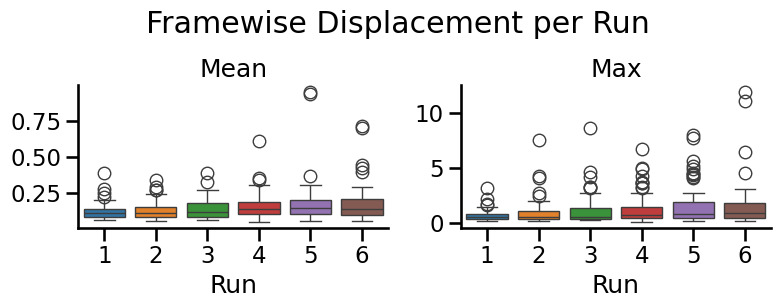

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.figure(figsize=(8,3.5))

# Plot for each run's mean values
plt.subplot(1, 2, 1)
sns.boxplot(data=df[[f'run_{run}_mean' for run in range(1, 7)]])
plt.title('Mean')
plt.xlabel('Run')
plt.xticks(ticks=range(6), labels=[f'{run}' for run in range(1, 7)])

# Plot for each run's max values
plt.subplot(1, 2, 2)
sns.boxplot(data=df[[f'run_{run}_max' for run in range(1, 7)]])
plt.title('Max')
plt.xlabel('Run')
plt.xticks(ticks=range(6), labels=[f'{run}' for run in range(1, 7)])

plt.suptitle('Framewise Displacement per Run',y=0.9 )
fig = plt.gcf()
#fig.subplots_adjust(top=0.12)
sns.despine()
plt.tight_layout()
plt.show()

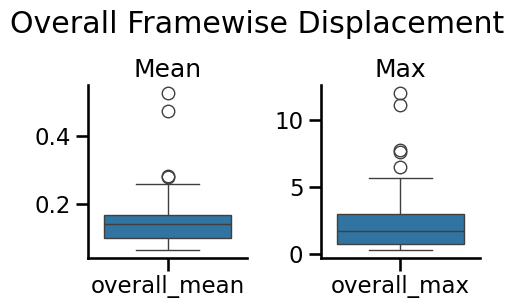

In [16]:
plt.figure(figsize=(5,3.5))

# Plot for overall mean values
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['overall_mean']])
plt.title('Mean')

# Plot for overall max values
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['overall_max']])
plt.title('Max')

plt.suptitle('Overall Framewise Displacement',y=0.9 )
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
df = df.reset_index()
# Function to identify outliers
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return outliers['subject'].tolist()

# Identify outliers for each run's mean values
for run in range(1, 7):
    outliers = find_outliers(df, f'run_{run}_mean')
    if outliers:
        print(f'Outliers for run {run} mean: {outliers}')

# Identify outliers for each run's max values
for run in range(1, 7):
    outliers = find_outliers(df, f'run_{run}_max')
    if outliers:
        print(f'Outliers for run {run} max: {outliers}')

# Identify outliers for overall mean values
outliers = find_outliers(df, 'overall_mean')
if outliers:
    print(f'Outliers for overall mean: {outliers}')

# Identify outliers for overall max values
outliers = find_outliers(df, 'overall_max')
if outliers:
    print(f'Outliers for overall max: {outliers}')

Outliers for run 1 mean: [2, 10, 41, 59]
Outliers for run 2 mean: [2, 41, 52, 63]
Outliers for run 3 mean: [41, 59]
Outliers for run 4 mean: [2, 32, 59]
Outliers for run 5 mean: [2, 57, 59]
Outliers for run 6 mean: [2, 32, 45, 52, 59]
Outliers for run 1 max: [23, 39, 41, 59]
Outliers for run 2 max: [3, 28, 32, 52, 63]
Outliers for run 3 max: [19, 34, 41, 58, 59, 63]
Outliers for run 4 max: [3, 6, 28, 32, 33, 34, 57, 59, 63]
Outliers for run 5 max: [2, 6, 7, 28, 32, 42, 52, 57, 59, 63]
Outliers for run 6 max: [28, 32, 52, 59]
Outliers for overall mean: [2, 32, 41, 59]
Outliers for overall max: [2, 28, 52, 59, 63]
